# Pre Requsits

In [1]:
# @title Drive Linking

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Requirements and Data

In [2]:
# @title Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# @title Loading Data
path = '/content/drive/MyDrive/SingaporeFlatData'

file_paths = []

for path, _, files in os.walk(path):
    for f in files:
        file_paths.append(fr'{path}/{f}') if f.endswith('.csv') else None

df = pd.concat([pd.read_csv(p) for p in file_paths])
df.reset_index(drop=True, inplace=True)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,NaN
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,NaN
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,NaN
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,NaN
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,NaN


# Visualizing Data

In [4]:
# @title Data Visualization

print(f'''
Data Shape:
{df.shape}

Data Describe:
{df.describe()}

Data Null Values:
{df.isnull().sum()}

Data Info:''')
df.info()


Data Shape:
(930405, 11)

Data Describe:
       floor_area_sqm  lease_commence_date  resale_price
count   930405.000000        930405.000000  9.304050e+05
mean        95.689875          1988.310993  3.217942e+05
std         25.819498            10.698887  1.714251e+05
min         28.000000          1966.000000  5.000000e+03
25%         73.000000          1981.000000  1.940000e+05
50%         93.000000          1986.000000  2.980000e+05
75%        113.000000          1996.000000  4.190000e+05
max        307.000000          2020.000000  1.588000e+06

Data Null Values:
month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930405 entries, 0 to 

In [5]:
df.floor_area_sqm.unique()

array([ 45. ,  44. ,  68. ,  67. ,  73. ,  69. ,  74. ,  82. ,  83. ,
        81. ,  88. ,  91. ,  92. ,  89. ,  93. ,  98. , 117. ,  95. ,
       121. , 119. ,  90. , 120. , 138. , 110. , 111. ,  61. ,  59. ,
        65. ,  60. ,  64. ,  79. ,  66. ,  70. ,  76. ,  71. ,  84. ,
       103. , 102. , 123. , 105. , 104. , 107. , 127. , 148. , 125. ,
       122. , 143. , 140. , 124. , 139. , 112. , 152. , 129. , 146. ,
       176. , 108. , 113. , 114. ,  99. , 149. , 133. , 147. , 150. ,
       165. ,  94. ,  96. , 100. , 130. , 134. , 153. , 118. , 132. ,
       115. , 145. , 144. ,  53. ,  54. ,  63. ,  72. ,  80. ,  75. ,
        77. ,  85. , 116. , 126. , 131. , 101. , 151. , 106. , 109. ,
       128. , 136. , 137. , 142. ,  97. ,  86. ,  46. ,  51. ,  56. ,
        58. ,  60.3,  55. ,  57. , 141. , 155. , 156. , 135. , 154. ,
        87. ,  42. ,  47. ,  48. ,  52. , 166. ,  50. ,  62. , 163. ,
       173. , 177. , 179. , 164. , 243. ,  34. , 161. ,  63.1, 157. ,
        78. ,  40. ,

In [6]:
df.flat_model.unique()

array(['Improved', 'New Generation', 'Standard', 'Model A', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Model A-Maisonette',
       'Apartment', 'Adjoined flat', 'Multi Generation', 'Model A2',
       'Terrace', 'Improved-Maisonette', 'Premium Maisonette', 'DBSS',
       'Type S1', 'IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD',
       'SIMPLIFIED', 'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE',
       'TERRACE', '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', '2-room', 'Type S2', 'Premium Apartment Loft',
       '3Gen'], dtype=object)

In [7]:
df.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN', 'LIM CHU KANG'], dtype=object)

In [8]:
df.street_name.unique()

array(['ANG MO KIO AVE 4', 'ANG MO KIO AVE 8', 'ANG MO KIO AVE 10',
       'ANG MO KIO AVE 5', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 1',
       'ANG MO KIO AVE 9', 'ANG MO KIO AVE 6', 'ANG MO KIO ST 32',
       'ANG MO KIO ST 52', 'ANG MO KIO ST 21', 'ANG MO KIO ST 31',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK NTH RD',
       'CHAI CHEE RD', 'BEDOK STH AVE 1', 'BEDOK NTH ST 4',
       'BEDOK NTH ST 2', 'BEDOK STH RD', 'CHAI CHEE DR', 'CHAI CHEE AVE',
       'BEDOK NTH AVE 1', 'BEDOK STH AVE 3', 'NEW UPP CHANGI RD',
       'BEDOK NTH AVE 4', 'BEDOK NTH ST 1', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 2', 'BEDOK STH AVE 2', 'CHAI CHEE ST',
       'BEDOK RESERVOIR VIEW', 'JLN TENAGA', 'JLN DAMAI', 'LENGKONG TIGA',
       'BEDOK CTRL', 'SIN MING AVE', 'BISHAN ST 11', 'BISHAN ST 12',
       'BISHAN ST 13', 'BISHAN ST 22', 'BISHAN ST 24', 'BISHAN ST 23',
       'SHUNFU RD', 'BT BATOK ST 52', 'BT BATOK WEST AVE 4',
       'BT BATOK WEST AVE 2', 'BT BATOK ST 31', 'BT BATOK ST 34',
  

In [9]:
df.lease_commence_date.unique()

array([1986, 1980, 1984, 1981, 1978, 1979, 1985, 1977, 1976, 1982, 2001,
       2003, 1996, 2002, 2006, 1972, 1988, 1983, 1975, 1987, 1993, 2000,
       1997, 2005, 1989, 2010, 1990, 1992, 1998, 2004, 1969, 1970, 1973,
       2008, 2009, 1999, 2007, 1974, 1994, 1995, 1971, 1967, 1991, 1968,
       1966, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [10]:
df.street_name.unique()

array(['ANG MO KIO AVE 4', 'ANG MO KIO AVE 8', 'ANG MO KIO AVE 10',
       'ANG MO KIO AVE 5', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 1',
       'ANG MO KIO AVE 9', 'ANG MO KIO AVE 6', 'ANG MO KIO ST 32',
       'ANG MO KIO ST 52', 'ANG MO KIO ST 21', 'ANG MO KIO ST 31',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK NTH RD',
       'CHAI CHEE RD', 'BEDOK STH AVE 1', 'BEDOK NTH ST 4',
       'BEDOK NTH ST 2', 'BEDOK STH RD', 'CHAI CHEE DR', 'CHAI CHEE AVE',
       'BEDOK NTH AVE 1', 'BEDOK STH AVE 3', 'NEW UPP CHANGI RD',
       'BEDOK NTH AVE 4', 'BEDOK NTH ST 1', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 2', 'BEDOK STH AVE 2', 'CHAI CHEE ST',
       'BEDOK RESERVOIR VIEW', 'JLN TENAGA', 'JLN DAMAI', 'LENGKONG TIGA',
       'BEDOK CTRL', 'SIN MING AVE', 'BISHAN ST 11', 'BISHAN ST 12',
       'BISHAN ST 13', 'BISHAN ST 22', 'BISHAN ST 24', 'BISHAN ST 23',
       'SHUNFU RD', 'BT BATOK ST 52', 'BT BATOK WEST AVE 4',
       'BT BATOK WEST AVE 2', 'BT BATOK ST 31', 'BT BATOK ST 34',
  

In [11]:
df.flat_type.unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION', '1 ROOM', 'MULTI GENERATION'], dtype=object)

In [12]:
df.month.unique()

array(['2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08',
       '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02',
       '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08',
       '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02',
       '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08',
       '2014-09', '2014-10', '2014-11', '2014-12', '1990-01', '1990-02',
       '1990-03', '1990-04', '1990-05', '1990-06', '1990-07', '1990-08',
       '1990-09', '1990-10', '1990-11', '1990-12', '1991-01', '1991-02',
       '1991-03', '1991-04', '1991-05', '1991-06', '1991-07', '1991-08',
       '1991-09', '1991-10', '1991-11', '1991-12', '1992-01', '1992-02',
       '1992-03', '1992-04', '1992-05', '1992-06', '1992-07', '1992-08',
       '1992-09', '1992-10', '1992-11', '1992-12', '1993-01', '1993-02',
       '1993-03', '1993-04', '1993-05', '1993-06', '1993-07', '1993-08',
       '1993-09', '1993-10', '1993-11', '1993-12', 

# Data Cleaning

In [13]:
# @title Treating Null Values
df.remaining_lease.fillna('0',inplace=True)
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [14]:
# @title Replacing MULTI-GENERATION with MULTI GENERATION

df.flat_type.replace('MULTI-GENERATION', 'MULTI GENERATION', inplace=True)
df.flat_type.unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', '1 ROOM'], dtype=object)

In [15]:
# @title Splitting 'month' Column to 'reg_year' and 'reg_month'

df.loc[:, 'reg_year'] = df.month.str.split('-').str[0]
df.loc[:, 'reg_month'] = df.month.str.split('-').str[1]
df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,0,2012,03
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,0,2012,03
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,0,2012,03
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,0,2012,03
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,0,2012,03


In [16]:
# @title Removing 'month' and 'remaining_lease' Columns

df.drop(columns=['month', 'remaining_lease'], inplace=True)
df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,reg_year,reg_month
0,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,2012,03
1,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,2012,03
2,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,2012,03
3,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,2012,03
4,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,2012,03


# Grapical Visualization

## Plotting functions

In [17]:
def box_plt(_df: pd.DataFrame, x_col: str, y_col: str, title: str | None = False):
    plt.figure(figsize=(20, 10))
    plt.title(title) if title else None
    sns.boxplot(x=x_col, y=y_col, data=_df, showfliers=False)
    plt.show()

In [18]:
def line_plt(_df: pd.DataFrame, x_col: str, y_col: str, title: str | None = False):
    plt.figure(figsize=(20, 10))
    plt.title(title) if title else None
    sns.lineplot(x=x_col, y=y_col, data=_df)
    plt.show()

In [19]:
def dist_plt(_df: pd.DataFrame, x_col: str, y_col: str, kde: bool | None = False, title: str | None = False):
    plt.figure(figsize=(20, 10))
    plt.title(title) if title else None
    sns.displot(data=_df, x=x_col, hue=y_col, kde=True) if kde else sns.displot(_df, x=x_col, y=y_col)
    plt.show()

In [20]:
def pie_plt(_df: pd.DataFrame, target_col: str, count_col: str, title: str | None = False):
    plt.figure(figsize=(20, 10))
    plt.title(title) if title else None
    _df.groupby(target_col)[count_col].nunique().plot(kind='pie', autopct='%1.1f%%')
    plt.show()

In [21]:
def heatmap_plt(_df: pd.DataFrame, title: str | None = False):
    plt.figure(figsize=(20, 10))
    plt.title(title) if title else None
    sns.heatmap(_df.corr(), annot=True)
    plt.show()

## Plots

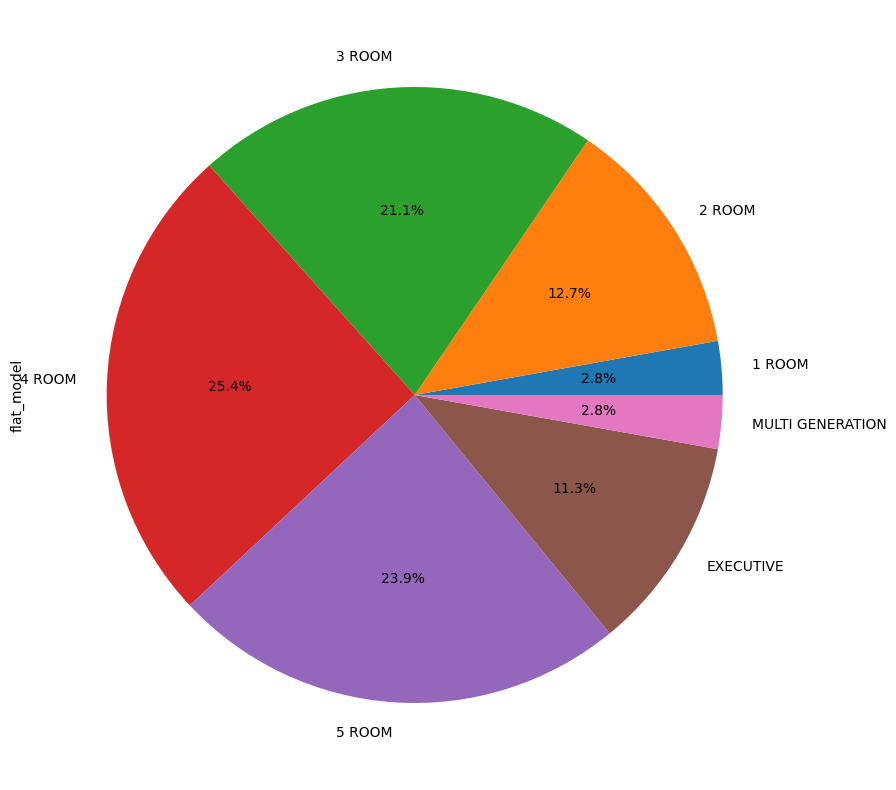

In [22]:
pie_plt(df, 'flat_type', 'flat_model')

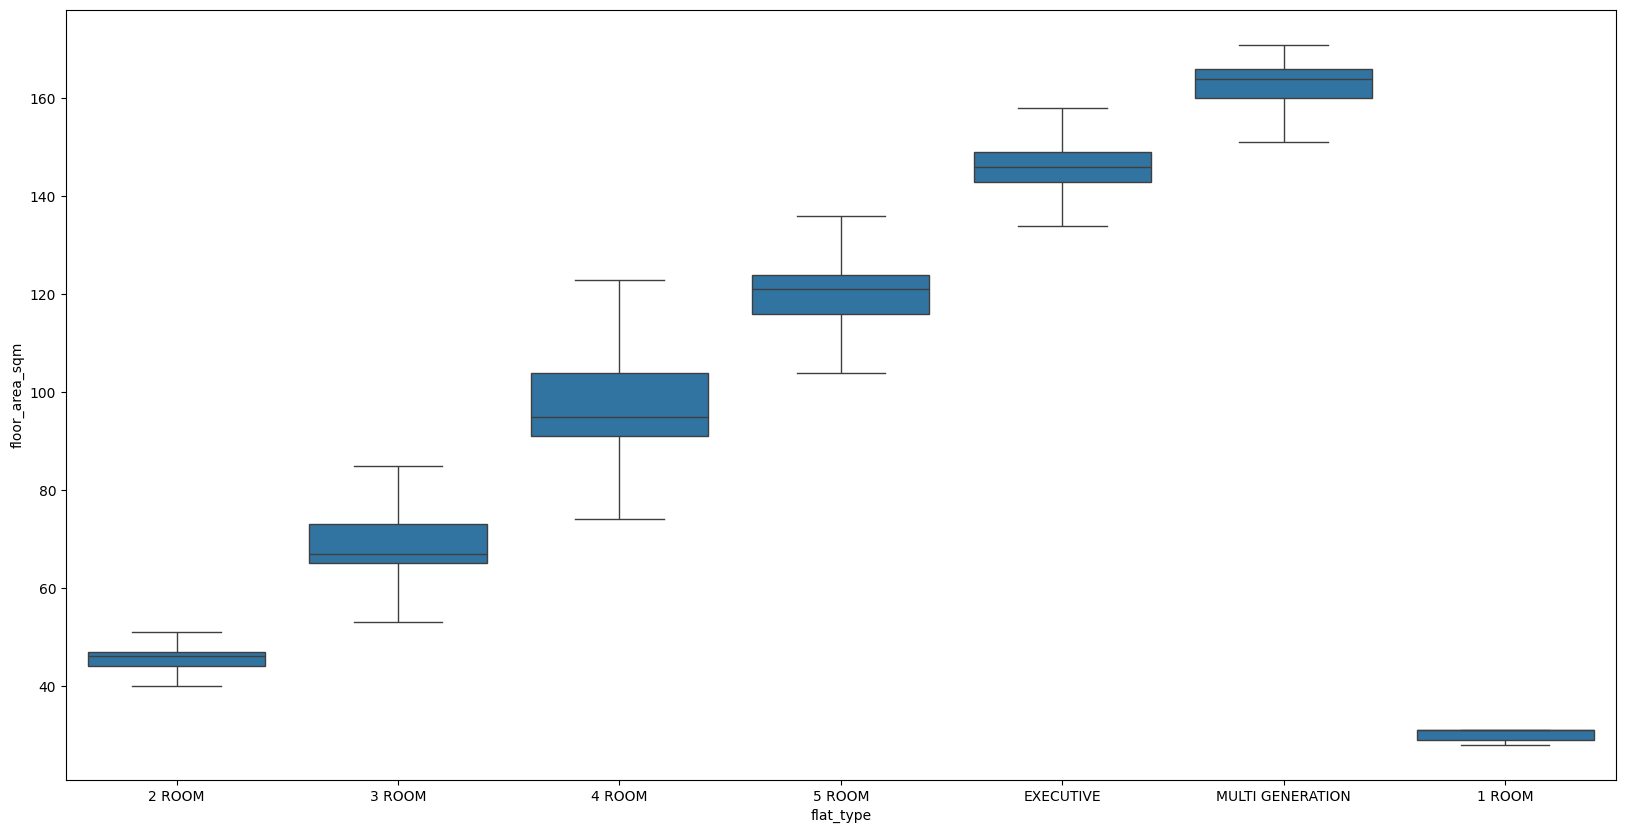

In [23]:
box_plt(df, 'flat_type', 'floor_area_sqm')

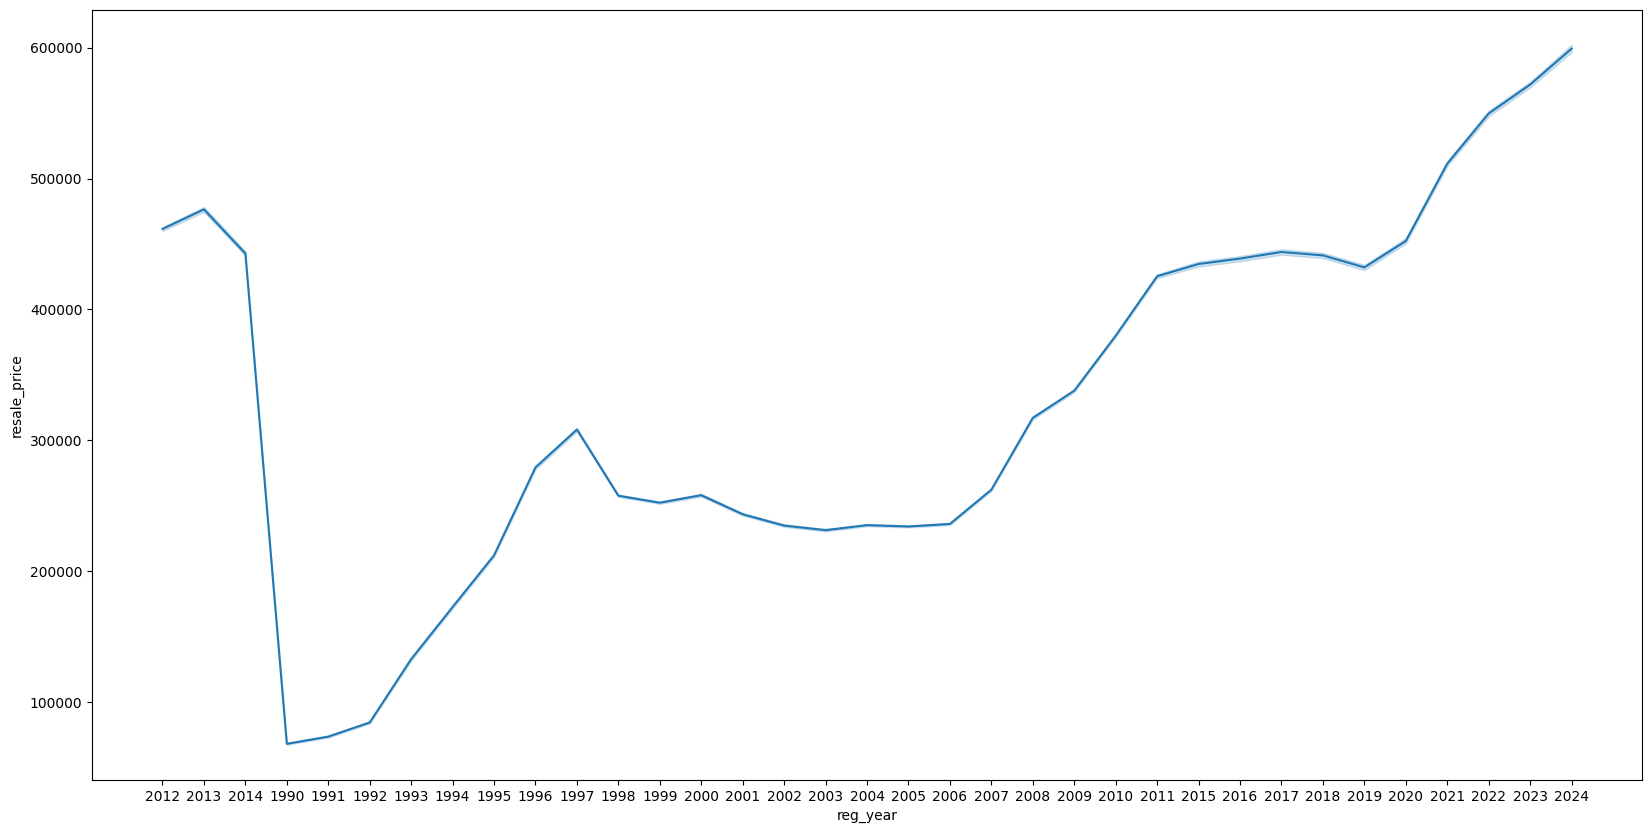

In [24]:
line_plt(df, 'reg_year', 'resale_price')

<Figure size 2000x1000 with 0 Axes>

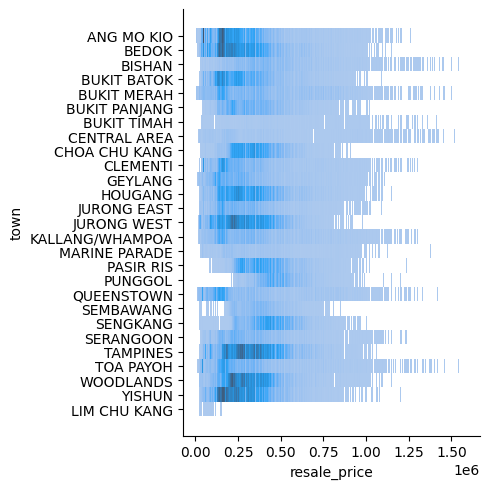

In [25]:
dist_plt(df, 'resale_price', 'town')

<Figure size 2000x1000 with 0 Axes>

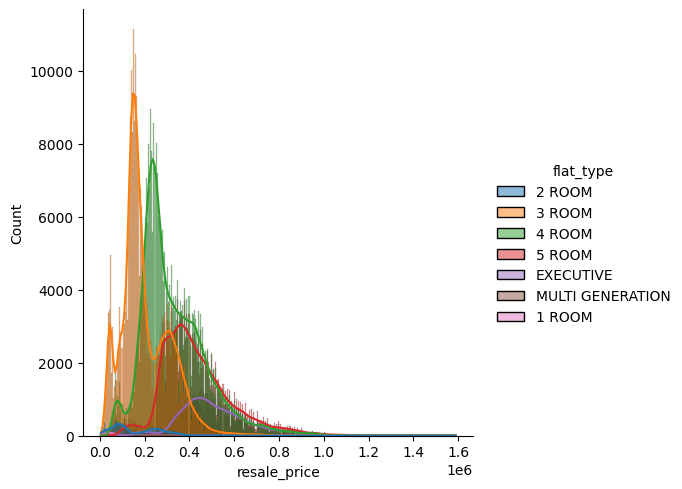

In [26]:
dist_plt(df,'resale_price', 'flat_type', kde=True)

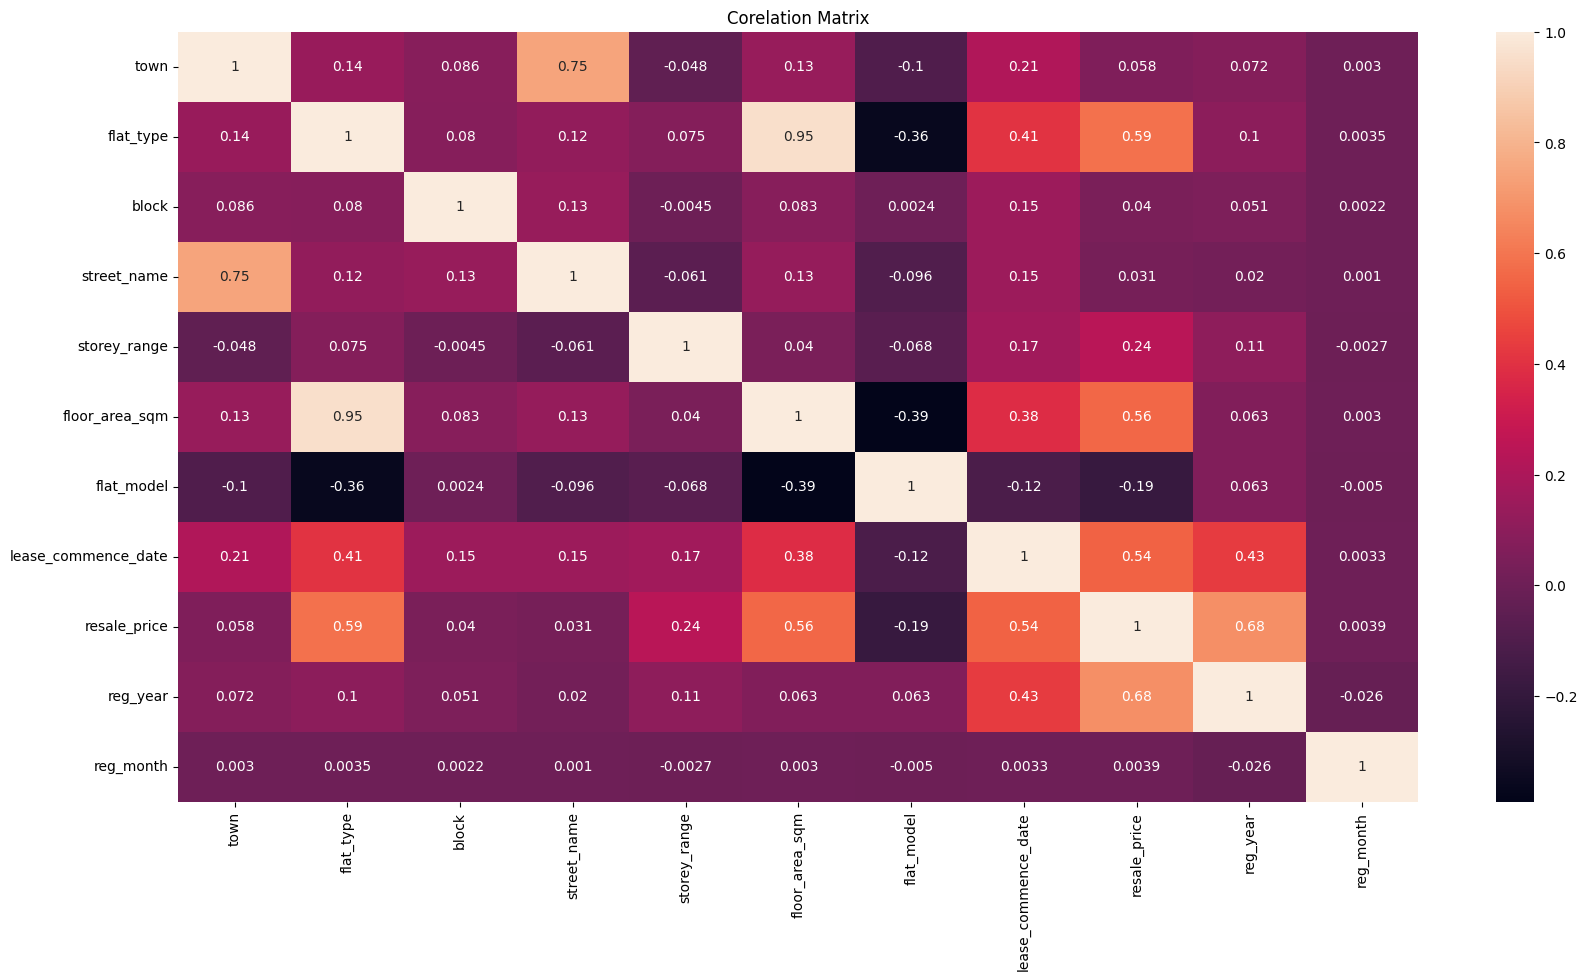

In [28]:
heatmap_plt(df, 'Corelation Matrix')

# Data Encoding

In [27]:
# @title One Hot Encoding to Convert Catogorical to Numerical

indices = {}

df.block, indices['block'] = df.block.factorize(sort=True)
df.flat_type, indices['flat_type'] = df.flat_type.factorize(sort=True)
df.flat_model, indices['flat_model'] = df.flat_model.factorize(sort=True)
df.street_name, indices['street_name'] = df.street_name.factorize(sort=True)
df.town, indices['town'] = df.town.factorize(sort=True)
df.storey_range, indices['storey_range'] = df.storey_range.factorize(sort=True)
df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,reg_year,reg_month
0,0,1,252,17,3,45.0,9,1986,250000.0,2012,03
1,0,1,1526,20,1,44.0,9,1980,265000.0,2012,03
2,0,2,1761,17,3,68.0,21,1980,315000.0,2012,03
3,0,2,1359,14,1,67.0,21,1984,320000.0,2012,03
4,0,2,1743,18,3,67.0,21,1980,321000.0,2012,03


# Model Selection and Training

In [29]:
# @title Splitting the data into Features and Target

x = df.drop('resale_price', axis=1)
y = df.resale_price

In [30]:
# @title Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

## Leniar Regression

In [31]:
# @title Training

linear_regression = LinearRegression()
linear_regression.fit(x_train , y_train)
y_pred = linear_regression.predict(x_test)

In [32]:
# @title Scores

print(f'MAE        =   {mean_absolute_error(y_test,y_pred)}')
print(f'MSE        =   {mean_squared_error(y_test,y_pred)}')
print(f'RMSE       =   {mean_squared_error(y_test,y_pred)**.5}')
print(f'R2 Score   =   {linear_regression.score(x_test,y_test)}')

MAE        =   61502.44097151384
MSE        =   6968637111.774326
RMSE       =   83478.36313545161
R2 Score   =   0.7635048860536888


## Decision Tree Regressor

In [33]:
# @title Training

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

In [34]:
# @title Scores

print(f'MAE        =   {mean_absolute_error(y_test,y_pred)}')
print(f'MSE        =   {mean_squared_error(y_test,y_pred)}')
print(f'RMSE       =   {mean_squared_error(y_test,y_pred)**.5}')
print(f'R2 Score   =   {decision_tree_regressor.score(x_test,y_test)}')

MAE        =   19942.347440384492
MSE        =   958196008.2059115
RMSE       =   30954.741287982226
R2 Score   =   0.967481636579888


# Save Model

In [35]:
import pickle

filename = 'decision_tree_regressor.pkl'
pickle.dump(decision_tree_regressor, open(filename, 'wb'))


In [37]:
import json

indices_dict = {x: pd.Series(indices[x]).to_dict() for x in indices}
with open('Encoded_Column_Data.json', 'w') as f:
    json.dump(indices_dict, f, indent=4)